<a href="https://colab.research.google.com/github/rayner-p/IA2/blob/main/PerceptronMonoCapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Universidad Politécnica Salesiana**
## Inteligencia Artificial II
### Rayner Palta
## ***Redes Neuronales y One Hot Encoding***


In [9]:
!pip install viznet


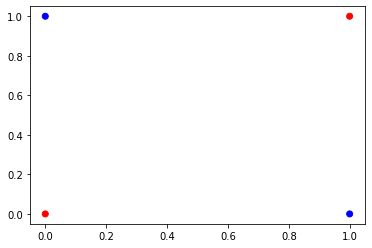

In [55]:
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

x=np.array([[0,0],[0,1],[1,0],[1,1]])
d=np.array([[0,0],[1,1],[1,1],[0,0]])
#pp.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'red' for i in d])

pp.scatter(x[:,0],x[:,1],color=['blue' if (i==1).any() else 'red' for i in d])

#pp.grid(True)
pp.show()

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> /usr/local/lib/python3.7/dist-packages/viznet/context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


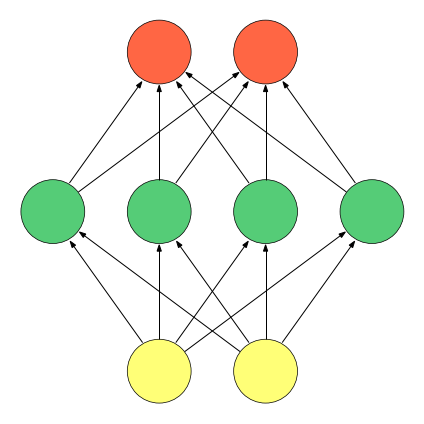

In [57]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow
entrada= 2
neuronas_capa_oculta=4
neuronas_capa_salida=2

def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entrada, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()
    

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))
print(mlp)

mlp.fit (x,d)

print('Pesos W^(0): \n:',mlp.coefs_[0])
print('Pesos W^(1): \n:',mlp.coefs_[1])

for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=1e-15, validation_fraction=0.1, verbose=True,
              warm_start=False)
Pesos W^(0): 
: [[ 1.20859271e-02  4.88374634e+00 -4.88577594e+00 -1.52875855e-02]
 [ 9.31368277e-03 -4.87974538e+00  4.87952069e+00 -3.53721206e-03]]
Pesos W^(1): 
: [[-2.43076516e-02 -5.38451241e-03]
 [ 6.08500908e+00 -6.08872465e+00]
 [ 6.08377048e+00 -6.08779246e+00]
 [-4.85400434e-03 -1.47837797e-03]]

Prueba con { 0|0 } =>  [[0 0]]

Prueba con { 0|1 } =>  [[1 1]]

Prueba con { 1|0 } =>  [[1 1]]

Prueba con { 1|1 } =>  [[0 0]]


#One Hot Encoding 
##Práctica 1. Modificar el código dado con el fin de usar One Hot Encoding dentro del mismo
 

In [61]:
enc = OneHotEncoder()
y = OneHotEncoder().fit_transform(x).toarray()
dd = OneHotEncoder().fit_transform(d).toarray()
enc.fit(y)
enc.fit(dd)
labels = enc.transform(y).toarray()
labels2 = enc.transform(dd).toarray()
print(y)
print(d)
#labels.shape

[[1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]]
[[0 0]
 [1 1]
 [1 1]
 [0 0]]


In [62]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))
print(mlp)

mlp.fit (y,d)

print('Pesos W^(0): \n:',mlp.coefs_[0])
print('Pesos W^(1): \n:',mlp.coefs_[1])

for entrada in y:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=1e-15, validation_fraction=0.1, verbose=True,
              warm_start=False)
Pesos W^(0): 
: [[-2.97371550e+00 -2.38123595e-03 -2.64341904e+00 -1.20966885e+00]
 [ 2.97226745e+00 -4.83649548e-03  2.64581952e+00  1.21571252e+00]
 [ 2.64407394e+00 -2.61432727e-03  2.97522351e+00 -1.20503188e+00]
 [-2.64634904e+00 -4.39473757e-03 -2.97299666e+00  1.21171204e+00]]
Pesos W^(1): 
: [[ 5.71048537e+00 -5.71534158e+00]
 [ 4.17919821e-03 -2.79637741e-03]
 [-5.71294348e+00  5.71230669e+00]
 [-1.19499342e+00  1.19404733e+00]]

Prueba con { 1.0|0.0|1.0|0

# Segundo ejercicio
## Genere 1000 puntos aleatorios con coordenadas $(x_{1}, x_{2})$. Con estos puntos, deberá realizar las siguientes tareas:

### Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.

> 

1. Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.
2.   Entrenar la red hasta lograr un error mínimo.
3.   Probar la red y presentar la matriz de confusión.
4. Indicar el nivel de precisión (muestras correctamente clasificadas frente al total de muestras):

In [17]:
import random as rd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
coords =[] 
x1= [(rd.random()) for _ in range(1000)]
x2= [(rd.random()) for _ in range(1000)]
valores= [x1, x2]
#coords = np.random.rand(1000)
print(x1)
print(x2)
print(valores)


[0.22103912674625525, 0.8111900042630228, 0.42951426299031836, 0.7469652375524678, 0.7979359623540457, 0.6536373836439845, 0.07201120040511122, 0.8507641059773695, 0.48162443572602454, 0.9673584540752799, 0.5370721778609542, 0.2764988643505668, 0.614662018594901, 0.5623430429941367, 0.6409426282518532, 0.6198776417819745, 0.4870239703384154, 0.7702083954520236, 0.9580320447061101, 0.09508488900109491, 0.0993189241309731, 0.14947398785596466, 0.6497678523724131, 0.4523989180580935, 0.9941709438671489, 0.4192831902086438, 0.2029946712451045, 0.48892695493552474, 0.2644535556546841, 0.3674780738563771, 0.19279225122364307, 0.7186995808470215, 0.40631395955456406, 0.6651365550099916, 0.6289820247829946, 0.8891568314826679, 0.8175679382448483, 0.5085360703394999, 0.6681534105703026, 0.24730396148493516, 0.8394046025844185, 0.27963056952858434, 0.9019917096696914, 0.6834029912109786, 0.610150012036229, 0.36274289198627496, 0.6956694768121002, 0.11076053096730687, 0.07574478456719702, 0.58349

In [20]:
scaler = preprocessing.StandardScaler().fit(valores)
datos_escalados = scaler.transform(valores)

print('Media: ',scaler.mean_)

datos_escalados

Media:  [0.31327242 0.67561776 0.31274225 0.50988556 0.8862949  0.4104237
 0.43759291 0.91541269 0.67506542 0.65235786 0.58541102 0.21340183
 0.72053828 0.7045257  0.44855534 0.75287293 0.50884203 0.76217591
 0.68678124 0.31952159 0.0974391  0.49951838 0.326218   0.2479631
 0.98247759 0.46424586 0.46181461 0.24774895 0.23038273 0.32448983
 0.31163693 0.84672132 0.28188664 0.65134519 0.50870544 0.48891609
 0.64215906 0.68628032 0.79470518 0.40196202 0.70294916 0.25569685
 0.60828038 0.55405573 0.41024015 0.5834528  0.55558819 0.22017564
 0.18095516 0.3466004  0.44627959 0.51941958 0.47153257 0.29907465
 0.72853181 0.60787614 0.22229707 0.50589837 0.55082773 0.88815554
 0.40912235 0.61545611 0.200273   0.85115691 0.28654855 0.53924855
 0.62088849 0.64530011 0.46156718 0.58245858 0.73198657 0.10269724
 0.72799804 0.28705004 0.16475095 0.58407952 0.75052379 0.50599179
 0.66716097 0.2843554  0.23086438 0.73905677 0.71017361 0.48300388
 0.28333599 0.39035162 0.22780999 0.16104664 0.45704385 

array([[-1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1., -1., -1., ..., -1.,  1., -1.]])

In [21]:

enc = OneHotEncoder()
valor2 = OneHotEncoder().fit_transform(valores).toarray()
enc.fit(valor2)



OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [89]:
#X_train, X_test, y_train, y_test = train_test_split(datos_escalados,valor2,test_size=0.2, \
 #                                                  stratify = valor2, random_state = 73)
#X_train, xtest, ytrain, ytest = train_test_split(datos_escalados, valor2.iloc[:,1], test_size=0.2,
 # random_state=73, stratify=y.iloc[:,1])

xtrain, xtest, ytrain, ytest = train_test_split(datos_escalados, valor2, test_size=0.2, random_state=80)


In [117]:
mlp = MLPClassifier(hidden_layer_sizes = (10, 7, 4), activation = 'relu', solver = 'sgd', verbose = 10, \
                   random_state = 80, max_iter = 10000)

mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 7, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=80, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [118]:
mlp.fit(xtrain, ytrain)

Iteration 1, loss = 1387.63940718
Iteration 2, loss = 1386.52768555
Iteration 3, loss = 1384.72261513
Iteration 4, loss = 1380.96362767
Iteration 5, loss = 1369.57054993
Iteration 6, loss = 1325.08318683
Iteration 7, loss = 1118.01199721
Iteration 8, loss = 300.42313706
Iteration 9, loss = 0.00723436
Iteration 10, loss = 0.00345945
Iteration 11, loss = 0.00402197
Iteration 12, loss = 0.00461528
Iteration 13, loss = 0.00521975
Iteration 14, loss = 0.00582088
Iteration 15, loss = 0.00640814
Iteration 16, loss = 0.00697415
Iteration 17, loss = 0.00751389
Iteration 18, loss = 0.00802424
Iteration 19, loss = 0.00850347
Iteration 20, loss = 0.00895090
Iteration 21, loss = 0.00936664
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 7, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=80, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [119]:
y_pred = mlp.predict(xtest)
y_pred

array([[0, 1, 1, ..., 1, 1, 1]])

#Precisión de la RNA con la funcion de activacion relu y el solver sgd


In [120]:
from sklearn.metrics import multilabel_confusion_matrix
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = multilabel_confusion_matrix(y_pred, ytest)

acc = accuracy_score(ytest, y_pred)

print('Precisión de la RNA MLPClassifier: % 2.3f' % acc)

Precisión de la RNA MLPClassifier:  0.000


In [100]:
 cm

array([[[0, 1],
        [0, 0]],

       [[0, 0],
        [1, 0]],

       [[0, 0],
        [1, 0]],

       ...,

       [[0, 0],
        [1, 0]],

       [[0, 0],
        [1, 0]],

       [[0, 0],
        [0, 1]]])

#Precisión de la RNA con la funcion de activacion tanh y el solver adam

In [109]:
mlp = MLPClassifier(hidden_layer_sizes = (10, 7, 4), activation = 'tanh', solver = 'adam', verbose = 10, \
                   random_state = 80, max_iter = 10000)

mlp

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 7, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=80, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [110]:
mlp.fit(xtrain, ytrain)

Streaming output truncated to the last 5000 lines.
Iteration 4828, loss = 5.51936903
Iteration 4829, loss = 5.51673977
Iteration 4830, loss = 5.51411228
Iteration 4831, loss = 5.51148654
Iteration 4832, loss = 5.50886256
Iteration 4833, loss = 5.50624033
Iteration 4834, loss = 5.50361986
Iteration 4835, loss = 5.50100113
Iteration 4836, loss = 5.49838416
Iteration 4837, loss = 5.49576894
Iteration 4838, loss = 5.49315547
Iteration 4839, loss = 5.49054374
Iteration 4840, loss = 5.48793376
Iteration 4841, loss = 5.48532552
Iteration 4842, loss = 5.48271903
Iteration 4843, loss = 5.48011427
Iteration 4844, loss = 5.47751126
Iteration 4845, loss = 5.47490999
Iteration 4846, loss = 5.47231045
Iteration 4847, loss = 5.46971265
Iteration 4848, loss = 5.46711659
Iteration 4849, loss = 5.46452226
Iteration 4850, loss = 5.46192966
Iteration 4851, loss = 5.45933879
Iteration 4852, loss = 5.45674965
Iteration 4853, loss = 5.45416224
Iteration 4854, loss = 5.45157656
Iteration 4855, loss = 5.448992

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 7, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=80, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [112]:
y_pred = mlp.predict(xtest)
y_pred

array([[1, 0, 0, ..., 0, 0, 1]])

In [113]:
from sklearn.metrics import multilabel_confusion_matrix
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = multilabel_confusion_matrix(y_pred, ytest)

acc = accuracy_score(ytest, y_pred)

print('Precisión de la RNA MLPClassifier : % 2.3f' % acc)

Precisión de la RNA MLPClassifier :  1.000


In [114]:
cm

array([[[0, 0],
        [0, 1]],

       [[1, 0],
        [0, 0]],

       [[1, 0],
        [0, 0]],

       ...,

       [[1, 0],
        [0, 0]],

       [[1, 0],
        [0, 0]],

       [[0, 0],
        [0, 1]]])

*Enlace de repositorio*

